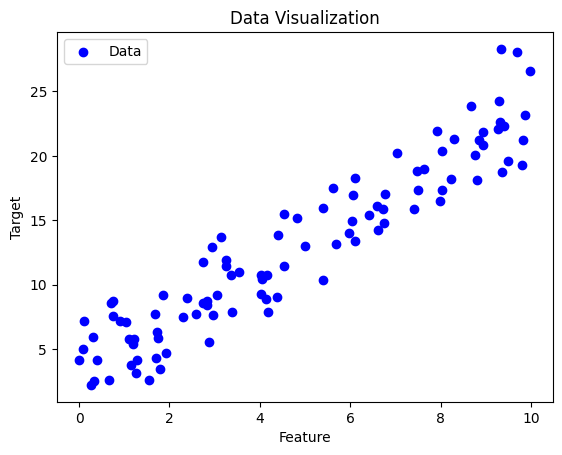

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data (for example purposes)
# Let's assume X has only one feature for simplicity
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 2 * X + 3 + np.random.randn(100, 1) * 2  # Linear relation with noise

# Plotting the data
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Data Visualization')
plt.legend()
plt.show()


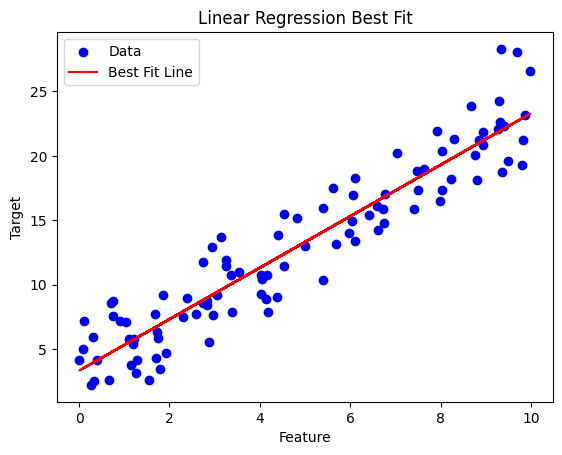

In [2]:
from sklearn.linear_model import LinearRegression

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data and the best fit line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Best Fit Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Best Fit')
plt.legend()
plt.show()


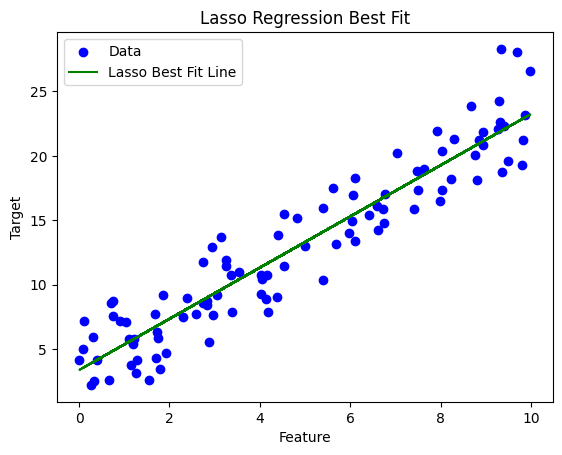

In [3]:
from sklearn.linear_model import Lasso

# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # alpha controls the strength of regularization
lasso.fit(X, y)

# Plot the data and the Lasso best fit line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, lasso.predict(X), color='green', label='Lasso Best Fit Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Lasso Regression Best Fit')
plt.legend()
plt.show()


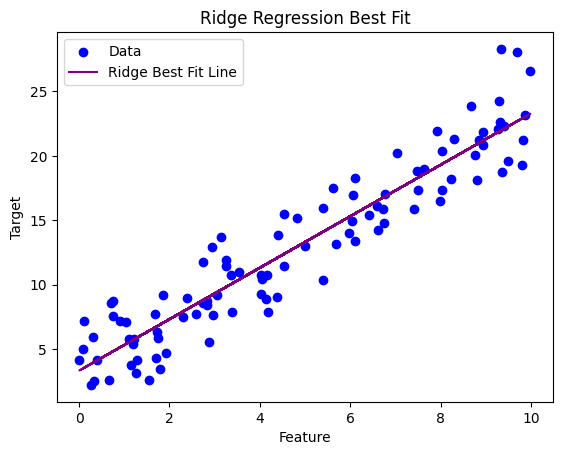

In [4]:
from sklearn.linear_model import Ridge

# Train Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

# Plot the data and the Ridge best fit line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, ridge.predict(X), color='purple', label='Ridge Best Fit Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Ridge Regression Best Fit')
plt.legend()
plt.show()


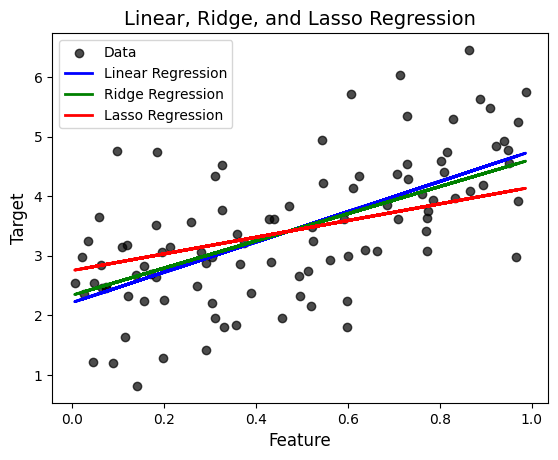

Linear Regression Metrics:
Mean Squared Error: 0.8065845639670535
R2 Score: 0.4120855714221856

Ridge Regression Metrics:
Mean Squared Error: 0.8125177849293098
R2 Score: 0.4077608838847815

Lasso Regression Metrics:
Mean Squared Error: 0.9207203362370251
R2 Score: 0.32889272304388606


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Generate random data for testing
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3 * X.squeeze() + 2 + np.random.randn(100)  # Linear relation with some noise

# Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lr = lin_reg.predict(X)

# Fit Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# Fit Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Plot the data points
plt.scatter(X, y, color='black', label='Data', alpha=0.7)

# Plot the regression lines
plt.plot(X, y_pred_lr, color='blue', label='Linear Regression', linewidth=2)
plt.plot(X, y_pred_ridge, color='green', label='Ridge Regression', linewidth=2)
plt.plot(X, y_pred_lasso, color='red', label='Lasso Regression', linewidth=2)

# Customize the plot
plt.title('Linear, Ridge, and Lasso Regression', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Evaluation metrics for all models
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred_lr)}")
print(f"R2 Score: {r2_score(y, y_pred_lr)}")

print("\nRidge Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred_ridge)}")
print(f"R2 Score: {r2_score(y, y_pred_ridge)}")

print("\nLasso Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred_lasso)}")
print(f"R2 Score: {r2_score(y, y_pred_lasso)}")


                      Model       MSE        R2
0         Linear Regression  0.839480  0.725094
1          Ridge Regression  0.843749  0.723696
2          Lasso Regression  1.202426  0.606239
4             Random Forest  1.404140  0.540184
7                  CatBoost  1.505413  0.507020
5  Support Vector Regressor  1.577433  0.483435
6                   XGBoost  1.659487  0.456565
3             Decision Tree  2.188684  0.283268


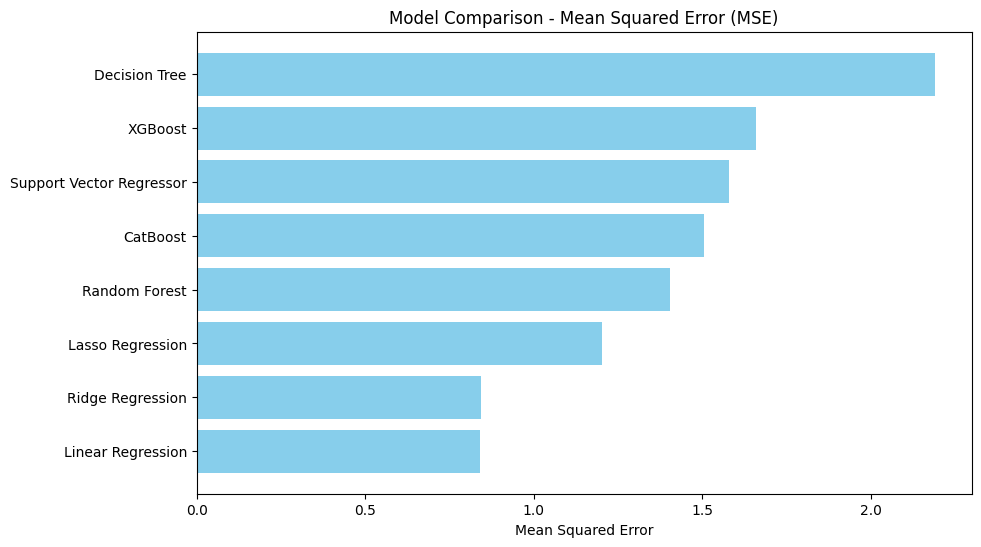

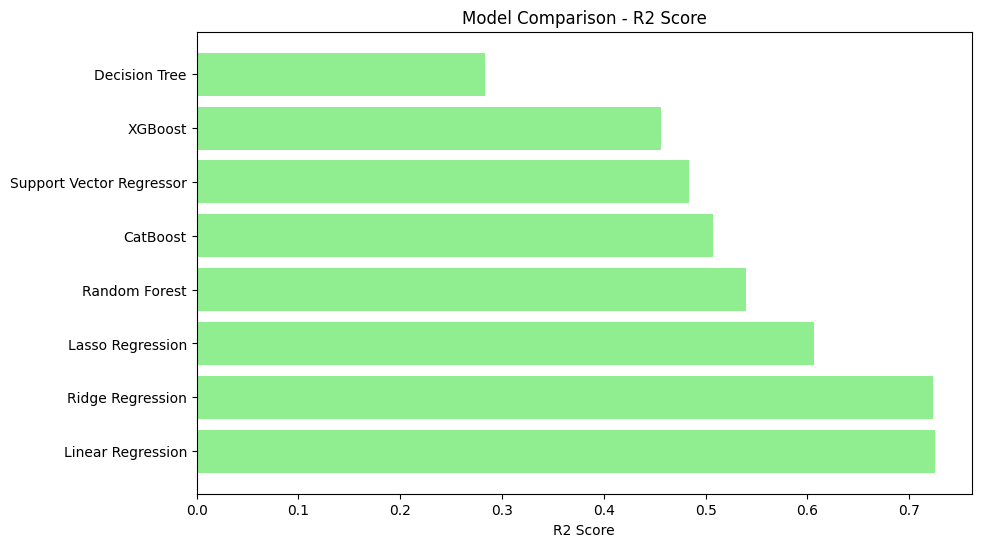


The best model based on R2 Score is: Linear Regression


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor

# Generating some example data (replace this with your actual dataset)
np.random.seed(42)
X = np.random.rand(100, 4)  # 100 samples, 4 features (e.g., location, education, experience, gender)
y = X.dot(np.array([1.5, -2.0, 3.0, 4.0])) + 1 + np.random.randn(100)  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models (excluding Logistic Regression since it's for classification)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regressor': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)
}


# Prepare dictionary to store results
results = {'Model': [], 'MSE': [], 'R2': []}

# Train the models and make predictions
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R2'].append(r2)

# Convert results to a pandas DataFrame for easy comparison
import pandas as pd
df_results = pd.DataFrame(results)

# Sort the results by R2 score (highest to lowest)
df_results_sorted = df_results.sort_values(by='R2', ascending=False)

# Print the results
print(df_results_sorted)

# Plotting the MSE comparison for all models
plt.figure(figsize=(10, 6))
plt.barh(df_results_sorted['Model'], df_results_sorted['MSE'], color='skyblue')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('Mean Squared Error')
plt.show()

# Plotting the R2 comparison for all models
plt.figure(figsize=(10, 6))
plt.barh(df_results_sorted['Model'], df_results_sorted['R2'], color='lightgreen')
plt.title('Model Comparison - R2 Score')
plt.xlabel('R2 Score')
plt.show()

# Best model based on R2 Score
best_model = df_results_sorted.iloc[0]['Model']
print(f"\nThe best model based on R2 Score is: {best_model}")
